In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

## Списки

Вам дан список. Поменяйте порядок следования каждого чётного элемента во второй половине списка. 

In [2]:
lst = [1, 2, 3, 4, 5, 10, 12, 8]
mid = len(lst) // 2
first_half = lst[:mid]
second_half = lst[mid:]

reversed_evens = [x for x in second_half if x % 2 == 0][::-1]

result = first_half.copy()
even_idx = 0

for elem in second_half:
    if elem % 2 == 0:
        result.append(reversed_evens[even_idx])
        even_idx += 1
    else:
        result.append(elem)
print(result)

[1, 2, 3, 4, 5, 8, 12, 10]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [3]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
lst[1:4:2], lst[-4:-1:2] = lst[-4:-1:2], lst[1:4:2]
print(lst)

[1, 8, 3, 10, 5, 6, 7, 2, 9, 4, 11]


## Генераторы

Вам дан список. Создайте новый список, в котором элементы будут уменьшены

In [4]:
lst = [1, 2, 3, 4]
lst = [x*(sqrt(141)-9)/20 for x in lst]
print(lst)

[0.14371710435189583, 0.28743420870379166, 0.43115131305568755, 0.5748684174075833]


Вам дан список. Создайте новый список, в котором будут чётные элементы возведены в квадрат, а нечётные в куб.

In [5]:
lst = [1, 2, 3, 4]
lst = [x**2 if x % 2 == 0 else x**3 for x in lst]
print(lst)

[1, 4, 27, 16]


## Встроенные функции

Вам дана строка. Выведите ascii-код минимального элемента в строке. 

In [6]:
s = "fghsfnslaaskaskas"
print(ord(min(s)))

97


Вам дана строка. Выведите строку, символы которой будут смещены по ascii на порядковый номер элемента.

In [7]:
s = "abcd"
s = [chr(ord(s[i])+i) for i in range(len(s))]
print(s)

['a', 'c', 'e', 'g']


## NumPy

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [8]:
n = 4
arr = np.ones((n**2, n**2))
ans = arr.reshape((n, n, n, n)).sum(axis=(1, 3))
print(ans)

[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


Даны линии и точка

Расчитайте расстояние от точки до каждой прямой, найдите ближащую.

2.1213203435596424


/tmp/ipykernel_3500/3191593019.py:10: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  num = abs(np.cross(line[0] - p, line[1] - line[0]))


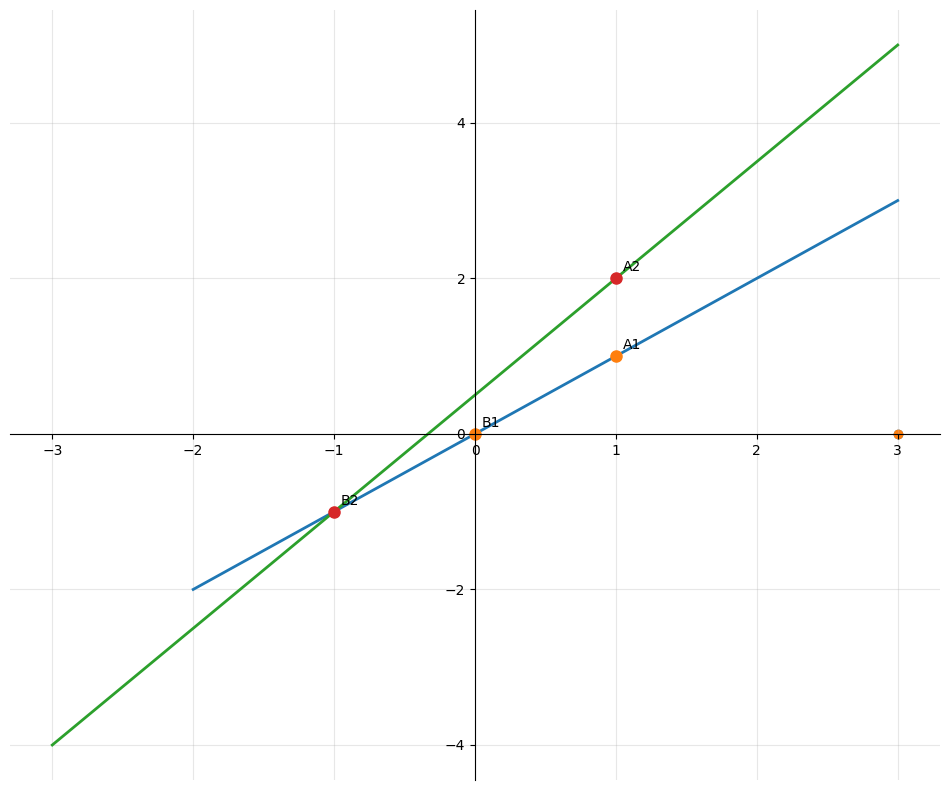

In [9]:
p = np.array([3, 0])
a1 = np.array([1, 1])
b1 = np.array([0, 0])
a2 = np.array([1, 2])
b2 = np.array([-1, -1])
lines = np.array([[a1, b1],
                   [a2, b2]])

def dist_to_line(line, p):
    num = abs(np.cross(line[0] - p, line[1] - line[0]))
    den = np.linalg.norm(line[1] - line[0])
    return num/den

ans = min([dist_to_line(l, p) for l in lines])
print(ans)

fig, ax = plt.subplots(figsize=(12, 10))
    
# Рисуем все прямые
for i, (A, B) in enumerate(lines):
    x1, y1 = A
    x2, y2 = B
    
    # Определяем диапазон для рисования
    if x1 == x2:  # Вертикальная прямая
        y_vals = np.linspace(min(y1, y2) - 2, max(y1, y2) + 2, 100)
        x_vals = np.full_like(y_vals, x1)
    else:
        x_vals = np.linspace(min(x1, x2) - 2, max(x1, x2) + 2, 100)
        k = (y2 - y1) / (x2 - x1)
        b = y1 - k * x1
        y_vals = k * x_vals + b
    
    ax.plot(x_vals, y_vals, linewidth=2, label=f'Прямая {i+1}')
    ax.plot([x1, x2], [y1, y2], 'o', markersize=8)  # Исходные точки
    ax.scatter(p[0], p[1])
    
    # Подписываем точки
    ax.annotate(f'A{i+1}', (x1, y1), xytext=(5, 5), textcoords='offset points')
    ax.annotate(f'B{i+1}', (x2, y2), xytext=(5, 5), textcoords='offset points')
ax.grid(alpha=0.3)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

## Pandas

https://www.kaggle.com/datasets/blurredmachine/hackerearth-employee-attrition?select=Train.csv

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте распределения переменной `Attrition_rate`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `Relationship_Status` *(т.е. отдельно какие показатели у класса Marries, какие у класса Single)*.
- Постройте гистаграмму для переменной `Unit` и найдите по ней самую популярную профессию.
- Найдите сколько замужних/женатых людей у самой популярной профессии имеют `Attrition_rate` выше среднего.

In [10]:
df = pd.read_csv("Train.csv")
df.dtypes.value_counts()

int64      9
float64    8
object     7
Name: count, dtype: int64

In [11]:
df.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

<Axes: xlabel='Attrition_rate', ylabel='Count'>

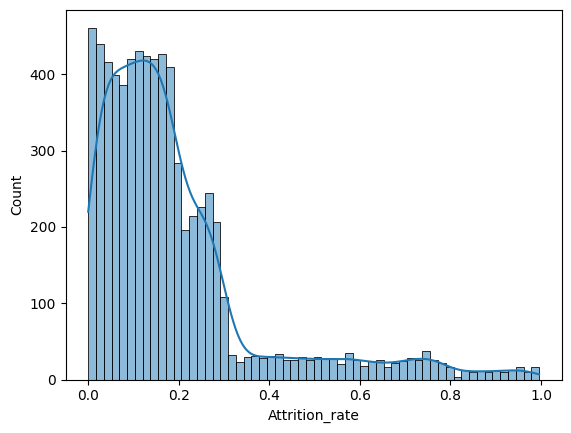

In [12]:
sns.histplot(df["Attrition_rate"], kde=True)

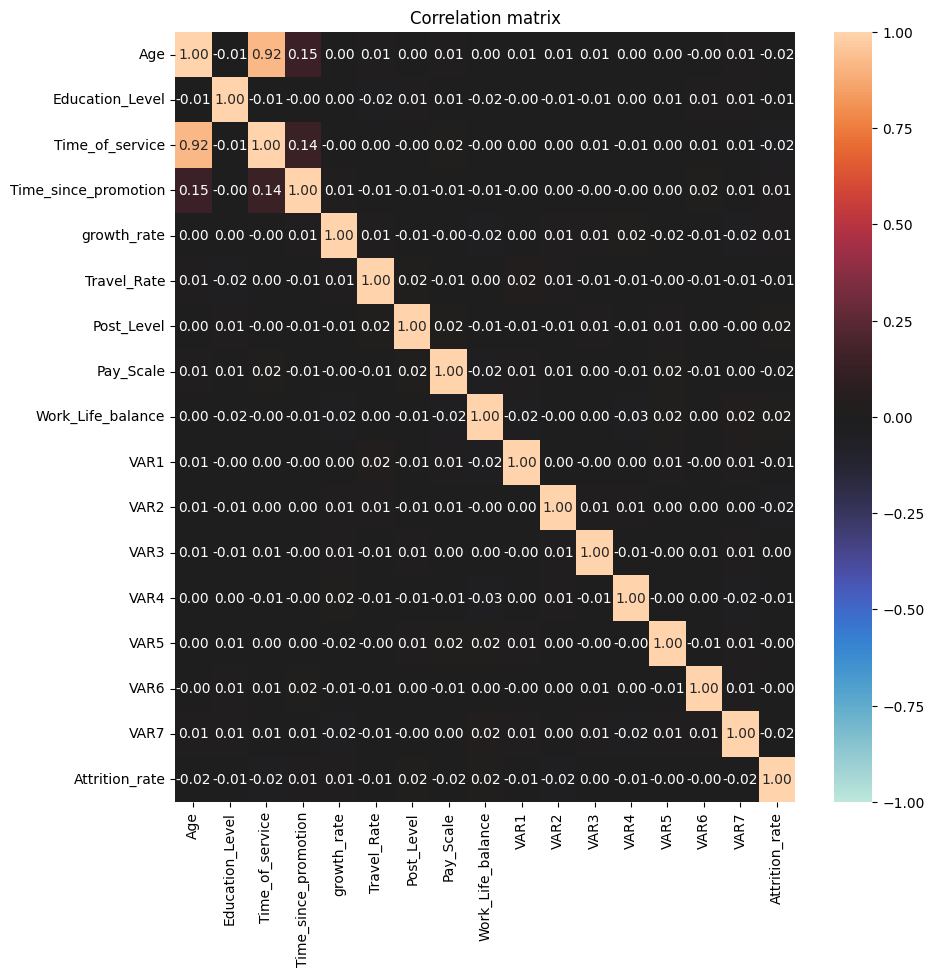

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="icefire", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [50]:
arr1 = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr2 = np.array([-49, -36, -25, -16, -9, -4, -1, 0])
np.corrcoef(arr1, arr2)

array([[1.        , 0.96152395],
       [0.96152395, 1.        ]])

<Figure size 1000x800 with 0 Axes>

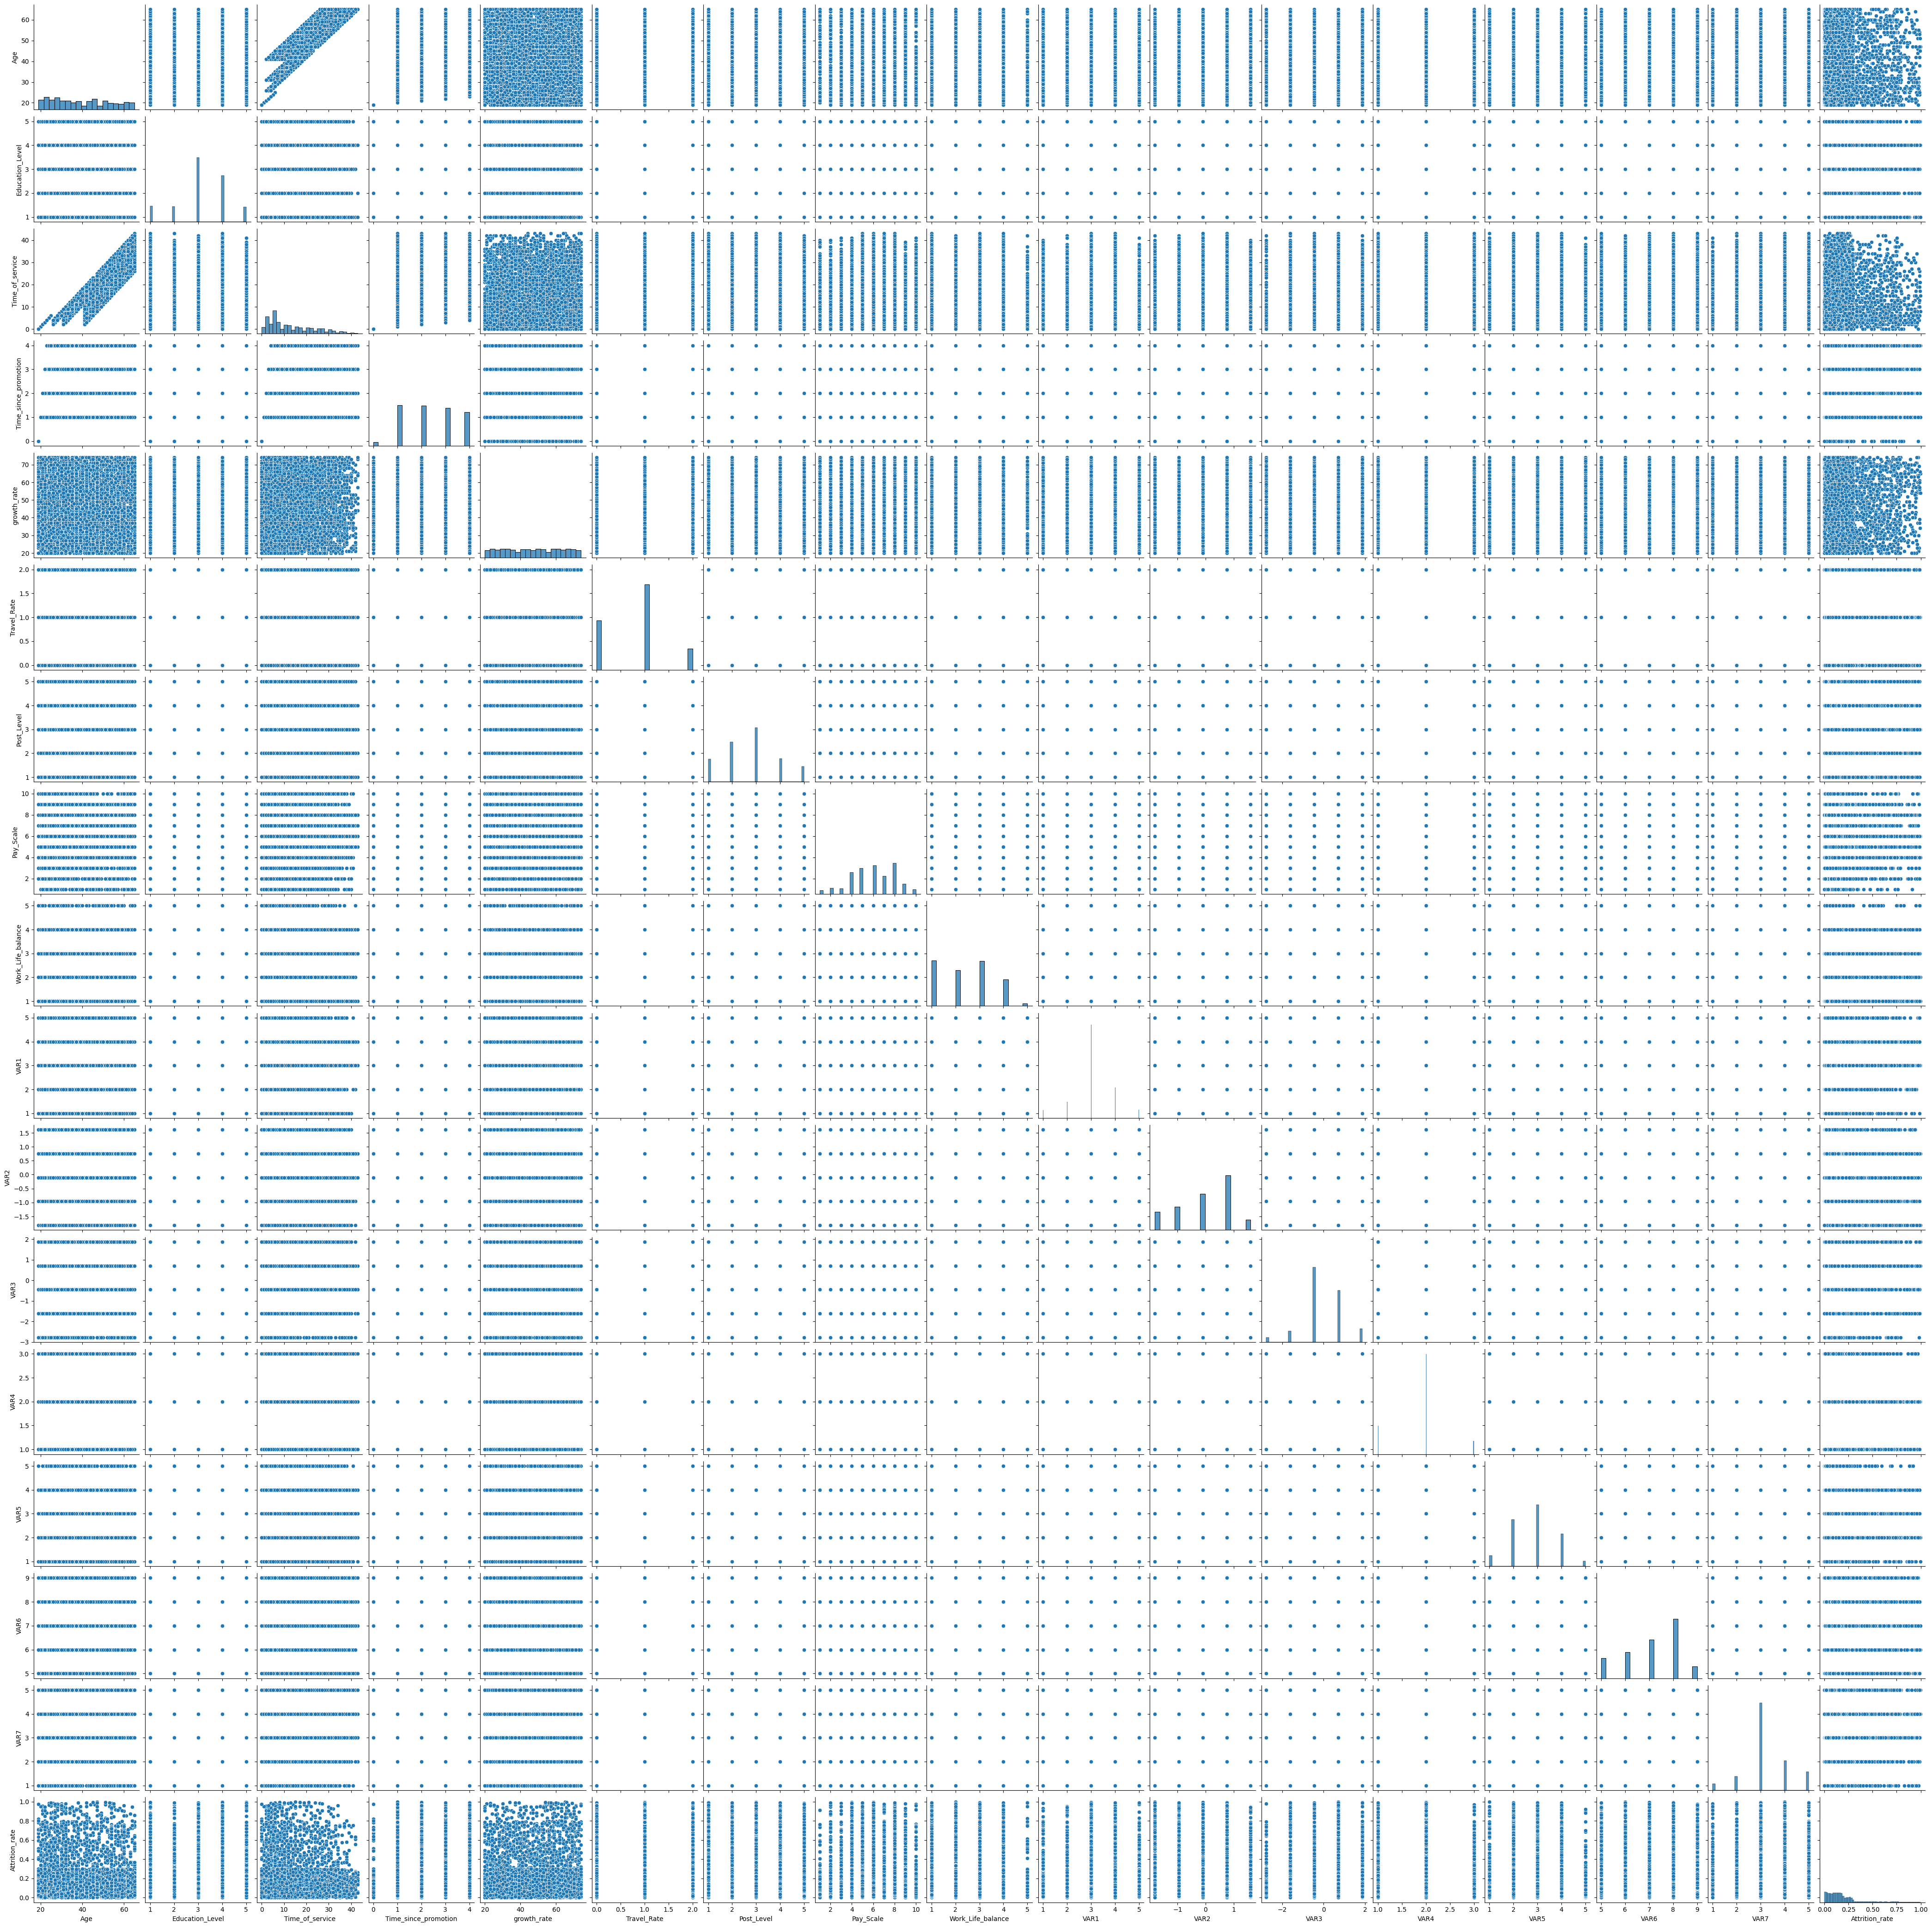

In [14]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

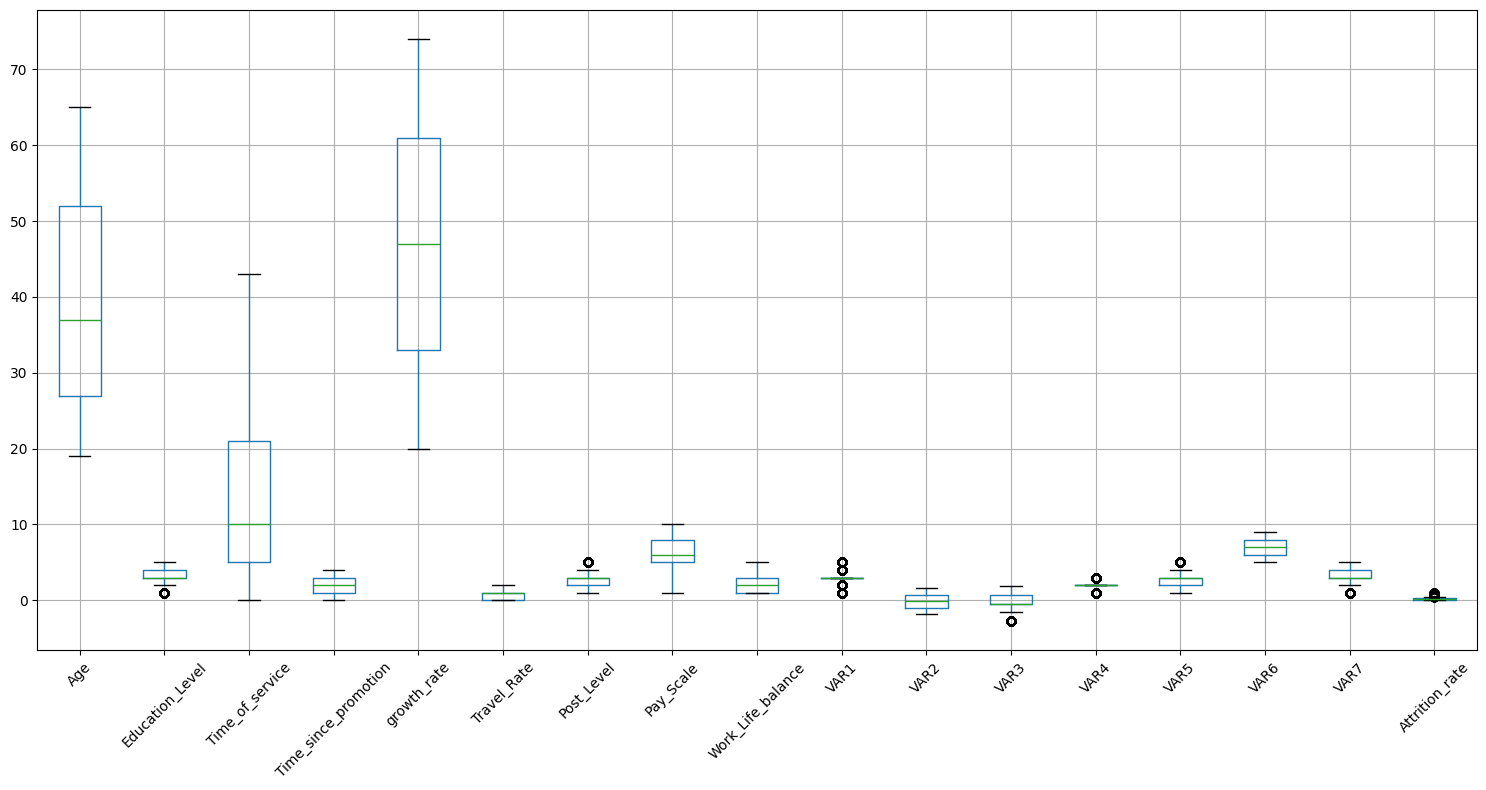

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 8))
df_numeric.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outlier_rows = set()
for column in df_numeric:
    outliers = find_outliers_iqr(df[column])
    outlier_rows.update(outliers.index)

print(f"Количество строк с выбросами: {len(outlier_rows)}")
print("Строки с выбросами:")
df.loc[list(outlier_rows)].head()

Количество строк с выбросами: 4953
Строки с выбросами:


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968


In [17]:
df["Relationship_Status"].value_counts()

Relationship_Status
Married    4520
Single     2480
Name: count, dtype: int64

In [18]:
df[df["Relationship_Status"] == "Married"].describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,4253.000000,4520.000000,4426.000000,4520.000000,4520.000000,4520.000000,4520.000000,4513.000000,4516.000000,4520.000000,4143.000000,4520.000000,4083.00000,4520.000000,4520.000000,4520.000000,4520.000000
mean,39.644486,3.188274,13.374605,2.371460,46.963053,0.815929,2.784513,5.993574,2.392161,3.093584,0.004764,-0.021848,1.88195,2.842920,7.102876,3.243142,0.188123
std,13.596805,1.055317,10.345958,1.143917,15.583473,0.645486,1.154776,2.076379,1.127575,0.842211,0.984729,0.983551,0.53057,0.933798,1.162515,0.930869,0.185186
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.00000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.00000,2.000000,6.000000,3.000000,0.071375
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.00000,3.000000,7.000000,3.000000,0.141550
75%,52.000000,4.000000,21.000000,3.000000,60.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.00000,3.000000,8.000000,4.000000,0.231200
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.00000,5.000000,9.000000,5.000000,0.991000


In [19]:
df[df["Relationship_Status"] == "Single"].describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,2335.000000,2480.000000,2430.000000,2480.000000,2480.000000,2480.000000,2480.000000,2478.000000,2473.000000,2480.000000,2280.000000,2480.000000,2261.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,39.583298,3.187097,13.404115,2.359274,47.248790,0.821371,2.822581,6.029459,2.380105,3.107661,-0.031549,0.001415,1.907563,2.818145,7.098387,3.282258,0.191660
std,13.628149,1.082925,10.399416,1.159503,16.082175,0.653247,1.179688,2.025558,1.114174,0.825729,0.998879,0.993089,0.527006,0.948233,1.167669,0.914766,0.186799
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.068600
50%,38.000000,3.000000,10.000000,2.000000,48.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.144700
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,4.000000,8.000000,3.000000,4.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.239500
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [48]:
from scipy.stats import ttest_rel
df1 = df[df["Relationship_Status"] == "Married"]["Age"]
df2 = df[df["Relationship_Status"] == "Single"]["Age"]

df1 = df1.sample(len(df2))
t_stat, p_value = ttest_rel(df1, df2, nan_policy="omit")
p_value


np.float64(0.890091417082128)

<Axes: xlabel='Количество работников', ylabel='Сфера деятельности'>

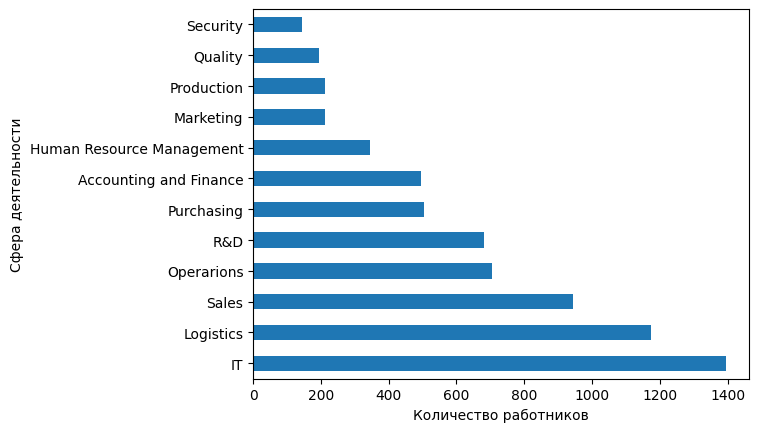

In [20]:
df["Unit"].value_counts().plot(
    kind="barh",
    xlabel="Количество работников",
    ylabel="Сфера деятельности"
)

In [21]:
mn = df["Attrition_rate"].mean()
len(df[(df["Relationship_Status"] == "Married") & (df["Unit"] == "IT") & (df["Attrition_rate"] > mn)])

293